# Попробуем решить задачу градиентным бустингом

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from seaborn import heatmap
from seaborn import countplot
from sklearn.metrics import mean_squared_error
import optuna
import xgboost
from sklearn import model_selection
from matplotlib import pylab

In [2]:
data_train = pd.read_csv('train.csv') # Загружаем датасет

In [3]:
data_train.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [4]:
# удалим id
data_train.drop(['id'], axis='columns', inplace=True)

In [5]:
data_train.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046


In [6]:
data_train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,0.506873,0.497898,0.521557,0.515683,0.502022,0.526515,0.487890,0.525163,0.459857,0.520532,0.483926,0.506877,0.553442,0.503713,7.905661
std,0.203976,0.228159,0.200770,0.233035,0.220701,0.217909,0.181096,0.216221,0.196685,0.201854,0.220082,0.218947,0.229730,0.208238,0.733071
min,-0.082263,-0.031397,0.020967,0.152761,0.276377,0.066166,-0.097666,0.217260,-0.240604,-0.085046,0.083277,0.088635,0.029950,0.166367,0.000000
25%,0.343078,0.319170,0.344096,0.294935,0.284108,0.356163,0.346600,0.341486,0.330832,0.375465,0.300474,0.310166,0.350472,0.308673,7.329367
50%,0.484005,0.553209,0.551471,0.482880,0.451733,0.470988,0.466825,0.483460,0.416843,0.458877,0.441916,0.486599,0.487707,0.431845,7.940571
75%,0.643789,0.731263,0.648315,0.748705,0.670660,0.694043,0.581292,0.685250,0.575041,0.700292,0.679128,0.694453,0.768479,0.712653,8.470084
max,1.016227,0.859697,1.006955,1.010402,1.034261,1.043858,1.066167,1.024427,1.004114,1.199951,1.022620,1.049025,0.977845,0.868506,10.267569


***Посмотрим на корреляции признаков и построим гистрограммы их распределения***

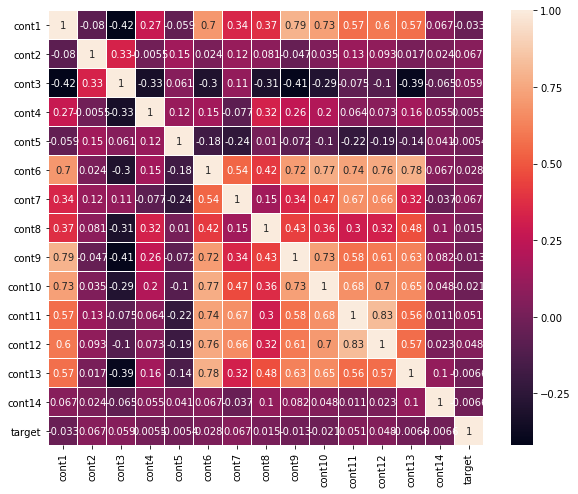

In [7]:
plt.figure(figsize=(10,8))
heatmap(data_train.corr(), square=True, annot=True, linewidths=.5)

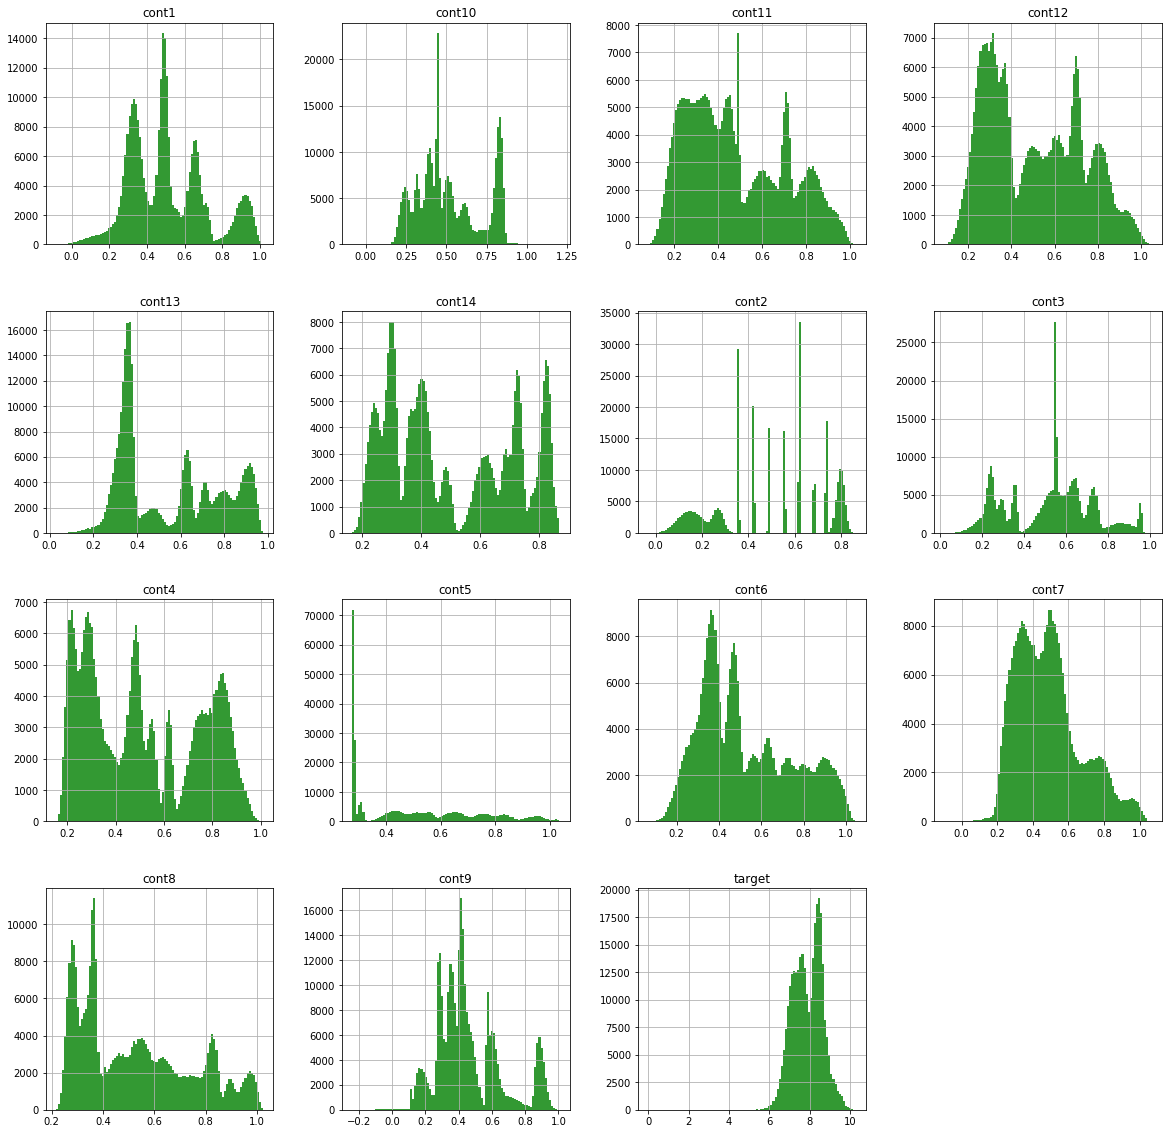

In [8]:
data_train.hist(figsize=(20,20), bins=100, color='green', alpha=0.8)
plt.show()

***Попробуем обучить модель с базовыми параметрами. Оценим качество по кросс-валидации по 5ти фолдам***

In [9]:
y_train = np.array(data_train['target'])
X_train = np.array(data_train.drop(['target'], axis='columns'))

In [10]:
%%time
estimator = xgboost.XGBRegressor(objective = 'reg:squarederror', learning_rate = 0.4,
                                 tree_method = 'gpu_hist', gpu_id = 0)
score = model_selection.cross_val_score(estimator, X_train, y_train, 
                                         scoring = 'neg_mean_squared_error', cv = 5)  

Wall time: 5.28 s


In [11]:
# Считаем среднее RMSE из 5ти моделей по cv
XGB_rmse_scores = np.sqrt(-score)
print('XGB_rmse_scores', XGB_rmse_scores)
print('mean_scores', XGB_rmse_scores.mean())

XGB_rmse_scores [0.70724686 0.70638292 0.7042774  0.70340582 0.7030961 ]
mean_scores 0.7048818209269293


***Попробуем подобрать оптимальный Learning_rate***

In [12]:
min_lr = 0.3
step_lr = 0.005
max_lr = 0.5
lrates = np.arange(min_lr, max_lr, step_lr)
lrates = np.round(lrates , 3)

In [13]:
%%time
scoring = []
for lrate in lrates:
    estimator = xgboost.XGBRegressor(objective = 'reg:squarederror', learning_rate = lrate,
                                 tree_method = 'gpu_hist', gpu_id = 0)
    score = model_selection.cross_val_score(estimator, X_train, y_train, 
                                         scoring = 'neg_mean_squared_error', cv = 5)
    scoring.append((np.sqrt(-score)).mean())   # добавляем средние rmse в список

Wall time: 3min 22s


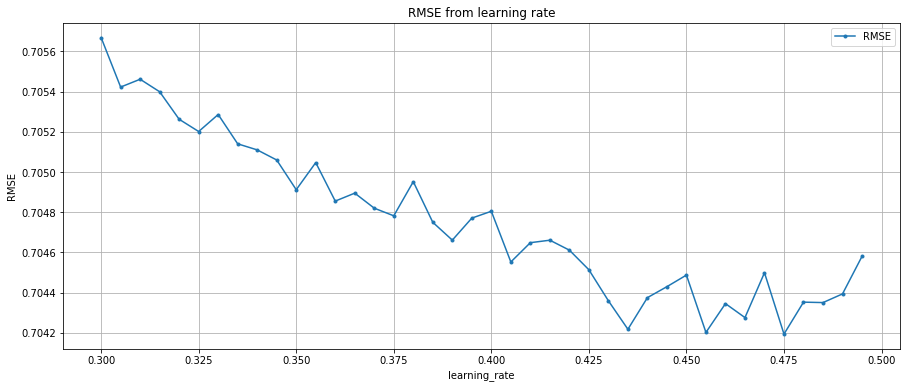

In [14]:
pylab.plot(lrates, scoring, marker='.', label='RMSE')
fig = plt.gcf()
fig.set_size_inches(15, 6, forward=True)
pylab.grid(True)
pylab.xlabel('learning_rate')
pylab.ylabel('RMSE')
pylab.title('RMSE from learning rate')
pylab.legend(loc='best')

In [15]:
best_lr = lrates[np.argmin(scoring)]

In [16]:
print ('минимальная RMSE', min(scoring))
print ('LR для минимальной RMSE', lrates[np.argmin(scoring)])

минимальная RMSE 0.7041940417688247
LR для минимальной RMSE 0.475


### Подберем лучшие гиперпараметры (регуляризаторы)  с помощью optuna

In [17]:
def objective(trial, data=X_train, target=y_train, best_lr=best_lr):
    
    param = {
        'tree_method':'gpu_hist',  
        'gpu_id' : 0,
        'lambda': 
            trial.suggest_loguniform('lambda', 1e-3, 1),
        'alpha': 
            trial.suggest_loguniform('alpha', 1e-3, 1),
        'learning_rate': best_lr
    }
    
    model = xgboost.XGBRegressor(**param)
    score = model_selection.cross_val_score(model, data, target, 
                                         scoring = 'neg_mean_squared_error', cv = 5)
    
    rmse = (np.sqrt(-score)).mean()  
    return (rmse)

In [18]:
# создаём optuna объект
study = optuna.create_study(direction='minimize') 

[I 2021-01-29 19:39:48,405] A new study created in memory with name: no-name-6ef0b83b-be16-4e0c-8e24-9a5d351dfe06


In [19]:
%%time
study.optimize(objective, n_trials=15)

[19:39:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:39:53,508] Trial 0 finished with value: 0.7042251372152555 and parameters: {'lambda': 0.032068796250721635, 'alpha': 0.053694253519668333}. Best is trial 0 with value: 0.7042251372152555.


[19:39:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:39:58,570] Trial 1 finished with value: 0.7042251358958176 and parameters: {'lambda': 0.012968182706153047, 'alpha': 0.0014412011419768465}. Best is trial 1 with value: 0.7042251358958176.


[19:39:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:39:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:03,667] Trial 2 finished with value: 0.7041940443876774 and parameters: {'lambda': 0.051533003209696046, 'alpha': 0.08904471060686261}. Best is trial 2 with value: 0.7041940443876774.


[19:40:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:08,722] Trial 3 finished with value: 0.7041940440738051 and parameters: {'lambda': 0.001342689072061491, 'alpha': 0.29609606113464604}. Best is trial 3 with value: 0.7041940440738051.


[19:40:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:13,779] Trial 4 finished with value: 0.7041940404809359 and parameters: {'lambda': 0.009165683435163557, 'alpha': 0.00708915321629463}. Best is trial 4 with value: 0.7041940404809359.


[19:40:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:18,901] Trial 5 finished with value: 0.704225135548651 and parameters: {'lambda': 0.06849076508251124, 'alpha': 0.0036256425971418595}. Best is trial 4 with value: 0.7041940404809359.


[19:40:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:24,081] Trial 6 finished with value: 0.704225138066559 and parameters: {'lambda': 0.11856705794274601, 'alpha': 0.02993526135884062}. Best is trial 4 with value: 0.7041940404809359.


[19:40:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:29,178] Trial 7 finished with value: 0.7041940425328447 and parameters: {'lambda': 0.014639757233238541, 'alpha': 0.2688379271247197}. Best is trial 4 with value: 0.7041940404809359.


[19:40:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:34,242] Trial 8 finished with value: 0.7042251394096046 and parameters: {'lambda': 0.013366644803726202, 'alpha': 0.00199676655280259}. Best is trial 4 with value: 0.7041940404809359.


[19:40:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:39,303] Trial 9 finished with value: 0.7042251359063844 and parameters: {'lambda': 0.20082672192442708, 'alpha': 0.004933947725858756}. Best is trial 4 with value: 0.7041940404809359.


[19:40:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:44,345] Trial 10 finished with value: 0.7041940453243425 and parameters: {'lambda': 0.9995824959524131, 'alpha': 0.012223498005500015}. Best is trial 4 with value: 0.7041940404809359.


[19:40:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:49,386] Trial 11 finished with value: 0.7041940416475428 and parameters: {'lambda': 0.002211037293839209, 'alpha': 0.6842580013420869}. Best is trial 4 with value: 0.7041940404809359.


[19:40:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:54,409] Trial 12 finished with value: 0.7041940463668684 and parameters: {'lambda': 0.0017815863523868588, 'alpha': 0.012732538002916977}. Best is trial 4 with value: 0.7041940404809359.


[19:40:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:40:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:40:59,484] Trial 13 finished with value: 0.7041940390481881 and parameters: {'lambda': 0.00393928795015513, 'alpha': 0.7249388871481102}. Best is trial 13 with value: 0.7041940390481881.


[19:40:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[I 2021-01-29 19:41:04,527] Trial 14 finished with value: 0.7042251358809449 and parameters: {'lambda': 0.0041904212254729335, 'alpha': 0.0057052840081825455}. Best is trial 13 with value: 0.7041940390481881.


Wall time: 1min 16s


In [20]:
# Лучшие параметры
best_params = study.best_trial.params
# добавляем параметры обучения на видеокарте, т.к они не включены и learning_rate 
best_params["learning_rate"] = best_lr
best_params["tree_method"] = "gpu_hist"
best_params["gpu_id"] = 0

In [21]:
best_params

{'lambda': 0.00393928795015513,
 'alpha': 0.7249388871481102,
 'learning_rate': 0.475,
 'tree_method': 'gpu_hist',
 'gpu_id': 0}

***Посмотрим на кач-во с лучшими параметрами***

In [22]:
estimator = xgboost.XGBRegressor(**best_params)
score = model_selection.cross_val_score(estimator, X_train, y_train, 
                                         scoring = 'neg_mean_squared_error', cv = 5)  

[19:41:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:07] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:41:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [23]:
XGB_rmse_scores = np.sqrt(-score)
print('XGB_rmse_scores', XGB_rmse_scores)
print('mean_scores', XGB_rmse_scores.mean())

XGB_rmse_scores [0.70668625 0.7059627  0.70313833 0.70290233 0.70243607]
mean_scores 0.7042251370627411


***Обученим на всей выборке без дробления на фолды***

In [24]:
model = estimator.fit(X_train, y_train)

[19:41:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


***Сохраним модель***

In [25]:
model.save_model('XGBoost_tabular_playgrounds.model')

# Сделаем предсказания

In [26]:
data_test = pd.read_csv('test.csv') # Загружаем датасет тестовый

In [27]:
sub = pd.read_csv('sample_submission.csv') # csv с ответами

***Предсказания на тестовый датасет***

In [28]:
features = [feature for feature in data_test.columns if feature not in ['id']]   # убираем id из списка признаков
preds = model.predict(np.array(data_test[features]))

***Посмотрим, куда нужно вносить ответы***

In [29]:
sub.head()

,id,target
0,0,0.5
1,2,0.5
2,6,0.5
3,7,0.5
4,10,0.5


***Заполним и сохраним***

In [30]:
sub['target'] = preds
print(sub.head())
sub.to_csv('xgboost_preds.csv', index=False)

   id    target
0   0  7.815476
1   2  7.796700
2   6  7.878983
3   7  8.178919
4  10  8.296173


### Public score 0.70608

Получилось гораздо лучше, чем при простой аппроксимации